In [9]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer

from sklearn.svm import SVR, SVC
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor, XGBClassifier

from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import mean_absolute_error, confusion_matrix, ConfusionMatrixDisplay

import pickle as pkl

In [10]:
# show max columns in pandas
pd.set_option('display.max_columns', None)

In [ ]:
patient_data =  pd.read_csv("./data/cleaned/data.csv")
patient_data

,subject_id,hadm_id,icustay_id,age,los_icu,gender_M,ethnicity_AMERICAN INDIAN/ALASKA NATIVE FEDERALLY RECOGNIZED TRIBE,ethnicity_ASIAN,ethnicity_ASIAN - ASIAN INDIAN,ethnicity_ASIAN - CAMBODIAN,ethnicity_ASIAN - CHINESE,ethnicity_ASIAN - FILIPINO,ethnicity_ASIAN - JAPANESE,ethnicity_ASIAN - KOREAN,ethnicity_ASIAN - OTHER,ethnicity_ASIAN - THAI,ethnicity_ASIAN - VIETNAMESE,ethnicity_BLACK/AFRICAN,ethnicity_BLACK/AFRICAN AMERICAN,ethnicity_BLACK/CAPE VERDEAN,ethnicity_BLACK/HAITIAN,ethnicity_CARIBBEAN ISLAND,ethnicity_HISPANIC OR LATINO,ethnicity_HISPANIC/LATINO - CENTRAL AMERICAN (OTHER),ethnicity_HISPANIC/LATINO - COLOMBIAN,ethnicity_HISPANIC/LATINO - CUBAN,ethnicity_HISPANIC/LATINO - DOMINICAN,ethnicity_HISPANIC/LATINO - GUATEMALAN,ethnicity_HISPANIC/LATINO - HONDURAN,ethnicity_HISPANIC/LATINO - MEXICAN,ethnicity_HISPANIC/LATINO - PUERTO RICAN,ethnicity_HISPANIC/LATINO - SALVADORAN,ethnicity_MIDDLE EASTERN,ethnicity_MULTI RACE ETHNICITY,ethnicity_NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER,ethnicity_OTHER,ethnicity_PATIENT DECLINED TO ANSWER,ethnicity_PORTUGUESE,ethnicity_SOUTH AMERICAN,ethnicity_UNABLE TO OBTAIN,ethnicity_UNKNOWN/NOT SPECIFIED,ethnicity_WHITE,ethnicity_WHITE - BRAZILIAN,ethnicity_WHITE - EASTERN EUROPEAN,ethnicity_WHITE - OTHER EUROPEAN,ethnicity_WHITE - RUSSIAN,first_careunit_CSRU,first_careunit_MICU,first_careunit_SICU,first_careunit_TSICU,insurance_Medicaid,insurance_Medicare,insurance_Private,insurance_Self Pay,admission_type_EMERGENCY,admission_type_URGENT,Category_Blood,Category_Circulatory,Category_Congenital,Category_Digestive,Category_Endocrine,Category_Genitourinary,Category_Infectious,Category_Injury,Category_Mental,Category_Misc,Category_Misc (code E or V),Category_Muscular,Category_Neoplasms,Category_Nervous,Category_Perinatal,Category_Pregrancy,Category_Respiratory,Category_Skin,alanine_aminotransferase_first,alanine_aminotransferase_last,albumin_first,albumin_last,albumin_ascites_first,albumin_ascites_last,albumin_pleural_first,albumin_pleural_last,albumin_urine_first,albumin_urine_last,alkaline_phosphate_first,alkaline_phosphate_last,anion_gap_first,anion_gap_last,asparate_aminotransferase_first,asparate_aminotransferase_last,basophils_first,basophils_last,bicarbonate_first,bicarbonate_last,bilirubin_first,bilirubin_last,blood_urea_nitrogen_first,blood_urea_nitrogen_last,co2_first,co2_last,"co2_(etco2,_pco2,_etc.)_first","co2_(etco2,_pco2,_etc.)_last",calcium_first,calcium_last,calcium_ionized_first,calcium_ionized_last,calcium_urine_first,calcium_urine_last,cardiac_index_first,cardiac_index_last,cardiac_output_thermodilution_first,cardiac_output_thermodilution_last,cardiac_output_fick_first,cardiac_output_fick_last,central_venous_pressure_first,central_venous_pressure_last,chloride_first,chloride_last,chloride_urine_first,chloride_urine_last,cholesterol_first,cholesterol_last,cholesterol_hdl_first,cholesterol_hdl_last,cholesterol_ldl_first,cholesterol_ldl_last,creatinine_first,creatinine_last,creatinine_ascites_first,creatinine_ascites_last,creatinine_body_fluid_first,creatinine_body_fluid_last,creatinine_pleural_first,creatinine_pleural_last,creatinine_urine_first,creatinine_urine_last,diastolic_blood_pressure_first,diastolic_blood_pressure_last,eosinophils_first,eosinophils_last,fibrinogen_first,fibrinogen_last,fraction_inspired_oxygen_first,fraction_inspired_oxygen_last,fraction_inspired_oxygen_set_first,fraction_inspired_oxygen_set_last,glascow_coma_scale_total_first,glascow_coma_scale_total_last,glucose_first,glucose_last,heart_rate_first,heart_rate_last,height_first,height_last,hematocrit_first,hematocrit_last,hemoglobin_first,hemoglobin_last,lactate_first,lactate_last,lactate_dehydrogenase_first,lactate_dehydrogenase_last,lactate_dehydrogenase_pleural_first,lactate_dehydrogenase_pleural_last,lactic_acid_first,lactic_acid_last,lymphocytes_first,lymphocytes_last,lymphocytes_ascites_first,lymphocytes_ascites_last,lymphocytes_atypical_first,lymphocytes_atypical_last,lymphocytes_atypical_csl

In [12]:
patient_data = patient_data.drop(columns=['subject_id', 'hadm_id', 'icustay_id'], axis=1)
patient_data                                         

,age,los_icu,gender_M,ethnicity_AMERICAN INDIAN/ALASKA NATIVE FEDERALLY RECOGNIZED TRIBE,ethnicity_ASIAN,ethnicity_ASIAN - ASIAN INDIAN,ethnicity_ASIAN - CAMBODIAN,ethnicity_ASIAN - CHINESE,ethnicity_ASIAN - FILIPINO,ethnicity_ASIAN - JAPANESE,ethnicity_ASIAN - KOREAN,ethnicity_ASIAN - OTHER,ethnicity_ASIAN - THAI,ethnicity_ASIAN - VIETNAMESE,ethnicity_BLACK/AFRICAN,ethnicity_BLACK/AFRICAN AMERICAN,ethnicity_BLACK/CAPE VERDEAN,ethnicity_BLACK/HAITIAN,ethnicity_CARIBBEAN ISLAND,ethnicity_HISPANIC OR LATINO,ethnicity_HISPANIC/LATINO - CENTRAL AMERICAN (OTHER),ethnicity_HISPANIC/LATINO - COLOMBIAN,ethnicity_HISPANIC/LATINO - CUBAN,ethnicity_HISPANIC/LATINO - DOMINICAN,ethnicity_HISPANIC/LATINO - GUATEMALAN,ethnicity_HISPANIC/LATINO - HONDURAN,ethnicity_HISPANIC/LATINO - MEXICAN,ethnicity_HISPANIC/LATINO - PUERTO RICAN,ethnicity_HISPANIC/LATINO - SALVADORAN,ethnicity_MIDDLE EASTERN,ethnicity_MULTI RACE ETHNICITY,ethnicity_NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER,ethnicity_OTHER,ethnicity_PATIENT DECLINED TO ANSWER,ethnicity_PORTUGUESE,ethnicity_SOUTH AMERICAN,ethnicity_UNABLE TO OBTAIN,ethnicity_UNKNOWN/NOT SPECIFIED,ethnicity_WHITE,ethnicity_WHITE - BRAZILIAN,ethnicity_WHITE - EASTERN EUROPEAN,ethnicity_WHITE - OTHER EUROPEAN,ethnicity_WHITE - RUSSIAN,first_careunit_CSRU,first_careunit_MICU,first_careunit_SICU,first_careunit_TSICU,insurance_Medicaid,insurance_Medicare,insurance_Private,insurance_Self Pay,admission_type_EMERGENCY,admission_type_URGENT,Category_Blood,Category_Circulatory,Category_Congenital,Category_Digestive,Category_Endocrine,Category_Genitourinary,Category_Infectious,Category_Injury,Category_Mental,Category_Misc,Category_Misc (code E or V),Category_Muscular,Category_Neoplasms,Category_Nervous,Category_Perinatal,Category_Pregrancy,Category_Respiratory,Category_Skin,alanine_aminotransferase_first,alanine_aminotransferase_last,albumin_first,albumin_last,albumin_ascites_first,albumin_ascites_last,albumin_pleural_first,albumin_pleural_last,albumin_urine_first,albumin_urine_last,alkaline_phosphate_first,alkaline_phosphate_last,anion_gap_first,anion_gap_last,asparate_aminotransferase_first,asparate_aminotransferase_last,basophils_first,basophils_last,bicarbonate_first,bicarbonate_last,bilirubin_first,bilirubin_last,blood_urea_nitrogen_first,blood_urea_nitrogen_last,co2_first,co2_last,"co2_(etco2,_pco2,_etc.)_first","co2_(etco2,_pco2,_etc.)_last",calcium_first,calcium_last,calcium_ionized_first,calcium_ionized_last,calcium_urine_first,calcium_urine_last,cardiac_index_first,cardiac_index_last,cardiac_output_thermodilution_first,cardiac_output_thermodilution_last,cardiac_output_fick_first,cardiac_output_fick_last,central_venous_pressure_first,central_venous_pressure_last,chloride_first,chloride_last,chloride_urine_first,chloride_urine_last,cholesterol_first,cholesterol_last,cholesterol_hdl_first,cholesterol_hdl_last,cholesterol_ldl_first,cholesterol_ldl_last,creatinine_first,creatinine_last,creatinine_ascites_first,creatinine_ascites_last,creatinine_body_fluid_first,creatinine_body_fluid_last,creatinine_pleural_first,creatinine_pleural_last,creatinine_urine_first,creatinine_urine_last,diastolic_blood_pressure_first,diastolic_blood_pressure_last,eosinophils_first,eosinophils_last,fibrinogen_first,fibrinogen_last,fraction_inspired_oxygen_first,fraction_inspired_oxygen_last,fraction_inspired_oxygen_set_first,fraction_inspired_oxygen_set_last,glascow_coma_scale_total_first,glascow_coma_scale_total_last,glucose_first,glucose_last,heart_rate_first,heart_rate_last,height_first,height_last,hematocrit_first,hematocrit_last,hemoglobin_first,hemoglobin_last,lactate_first,lactate_last,lactate_dehydrogenase_first,lactate_dehydrogenase_last,lactate_dehydrogenase_pleural_first,lactate_dehydrogenase_pleural_last,lactic_acid_first,lactic_acid_last,lymphocytes_first,lymphocytes_last,lymphocytes_ascites_first,lymphocytes_ascites_last,lymphocytes_atypical_first,lymphocytes_atypical_last,lymphocytes_atypical_csl_first,lymphocytes_atypical_cs

In [13]:
group_diagnoses = [i for i in patient_data.columns if i.startswith('Category_')]
baseline_features = [i for i in patient_data.columns if i not in group_diagnoses]
baseline_features.remove('total_los')

print('Baseline features:', baseline_features)
print('Group diagnoses:', group_diagnoses)

Baseline features: ['age', 'los_icu', 'gender_M', 'ethnicity_AMERICAN INDIAN/ALASKA NATIVE FEDERALLY RECOGNIZED TRIBE', 'ethnicity_ASIAN', 'ethnicity_ASIAN - ASIAN INDIAN', 'ethnicity_ASIAN - CAMBODIAN', 'ethnicity_ASIAN - CHINESE', 'ethnicity_ASIAN - FILIPINO', 'ethnicity_ASIAN - JAPANESE', 'ethnicity_ASIAN - KOREAN', 'ethnicity_ASIAN - OTHER', 'ethnicity_ASIAN - THAI', 'ethnicity_ASIAN - VIETNAMESE', 'ethnicity_BLACK/AFRICAN', 'ethnicity_BLACK/AFRICAN AMERICAN', 'ethnicity_BLACK/CAPE VERDEAN', 'ethnicity_BLACK/HAITIAN', 'ethnicity_CARIBBEAN ISLAND', 'ethnicity_HISPANIC OR LATINO', 'ethnicity_HISPANIC/LATINO - CENTRAL AMERICAN (OTHER)', 'ethnicity_HISPANIC/LATINO - COLOMBIAN', 'ethnicity_HISPANIC/LATINO - CUBAN', 'ethnicity_HISPANIC/LATINO - DOMINICAN', 'ethnicity_HISPANIC/LATINO - GUATEMALAN', 'ethnicity_HISPANIC/LATINO - HONDURAN', 'ethnicity_HISPANIC/LATINO - MEXICAN', 'ethnicity_HISPANIC/LATINO - PUERTO RICAN', 'ethnicity_HISPANIC/LATINO - SALVADORAN', 'ethnicity_MIDDLE EASTERN', 

## 5.4. Huấn luyện các mô hình học máy

### 5.4.1. Mô hình kinh điển

In [14]:
class ClassicModel:
    def __init__(self, model, params_grid, n_splits=10):
        self.model = model
        self.params_grid = params_grid
        self.kf = KFold(n_splits=n_splits)
        self.validation_scores = []
        self.best_params = None   
        self.scaler = MinMaxScaler()
        self.imputer = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=0)

    def fit(self, X, y):
        """Huấn luyện mô hình bằng cách sử dụng GridSearchCV và tìm tham số tốt nhất."""
        # Chia tập dữ liệu thành tập huấn luyện và tập kiểm tra
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

        # Lưu tập huấn luyện và tập kiểm tra để đánh giá sau này
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test 
        self.y_test = y_test

        # Xử lý dữ liệu: scale và impute
        X_train_imputed = self._preprocess(X_train, fit=True)  # Huấn luyện scaler và imputer

        # Thực hiện GridSearch để tìm tham số tốt nhất và huấn luyện mô hình
        self._grid_search(X_train_imputed, y_train)

    def evaluate(self):
        """Đánh giá mô hình sau khi huấn luyện."""
        # Đánh giá mô hình trên từng fold của KFold
        self._cross_validate()

        # Đánh giá trên tập kiểm tra
        mae_test = self._evaluate_test()

        return np.mean(self.validation_scores), mae_test

    def _preprocess(self, X, fit=True):
        """Scale và impute dữ liệu."""
        if fit:
            X_scaled = self.scaler.fit_transform(X)
            X_imputed = self.imputer.fit_transform(X_scaled)
        else:
            X_scaled = self.scaler.transform(X)
            X_imputed = self.imputer.transform(X_scaled)
        return X_imputed

    def _grid_search(self, X_train, y_train):
        """Thực hiện GridSearchCV để tìm tham số tốt nhất."""
        grid_search = GridSearchCV(estimator=self.model, param_grid=self.params_grid, 
                                   cv=self.kf, scoring='neg_mean_absolute_error')
        grid_search.fit(X_train, y_train)
        self.best_params = grid_search.best_params_

    def _cross_validate(self):
        """Huấn luyện và đánh giá mô hình trên từng fold của KFold."""
        for train_index, valid_index in self.kf.split(self.X_train):
            model = self.model.__class__(**self.best_params)
            X_train_kf, X_valid_kf = self.X_train.iloc[train_index], self.X_train.iloc[valid_index]
            y_train_kf, y_valid_kf = self.y_train.iloc[train_index], self.y_train.iloc[valid_index]

            # Huấn luyện mô hình với tham số tốt nhất
            X_train_kf_prepared = self._preprocess(X_train_kf, fit=True)
            model.fit(X_train_kf_prepared, y_train_kf)

            # Dự đoán và tính MAE trên tập validation
            y_pred = model.predict(self._preprocess(X_valid_kf, fit=False))
            validation_loss = mean_absolute_error(y_valid_kf, y_pred)
            self.validation_scores.append(validation_loss)

    def _evaluate_test(self):
        """Đánh giá mô hình trên tập kiểm tra."""
        model = self.model.__class__(**self.best_params)
        X_test_prepared = self._preprocess(self.X_test, fit=False)
        model.fit(self._preprocess(self.X_train, fit=True), self.y_train)
        y_pred = model.predict(X_test_prepared)
        mae_test = mean_absolute_error(self.y_test, y_pred)
        return mae_test

In [15]:
# XGboost model 
xgb_model = XGBRegressor()
xgb_params = {
    'learning_rate': [0.01, 0.02, 0.1, 0.2],
    'max_depth': [3, 5, 7, 9],
    'n_estimators': [200, 400, 600, 800]
}

In [16]:
# Evalute model with baseline features
xgb_baseline_classic = ClassicModel(xgb_model, xgb_params)
xgb_baseline_classic.fit(patient_data[baseline_features], patient_data['total_los'])

mve_xgb_base_classic, mae_xgb_base_classic = xgb_baseline_classic.evaluate()

print('Best params:', xgb_baseline_classic.best_params)
print('Mean validation score:', mve_xgb_base_classic)
print('MAE test:', mae_xgb_base_classic)

/home/thangthewinner/anaconda3/lib/python3.12/site-packages/sklearn/utils/_array_api.py:701: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmin(X, axis=axis))
/home/thangthewinner/anaconda3/lib/python3.12/site-packages/sklearn/utils/_array_api.py:718: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmax(X, axis=axis))
/home/thangthewinner/anaconda3/lib/python3.12/site-packages/sklearn/utils/_array_api.py:701: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmin(X, axis=axis))
/home/thangthewinner/anaconda3/lib/python3.12/site-packages/sklearn/utils/_array_api.py:718: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmax(X, axis=axis))
/home/thangthewinner/anaconda3/lib/python3.12/site-packages/sklearn/utils/_array_api.py:701: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmin(X, axis=axis))
/home/thangthewinner/anaconda3/lib/python3.12/site-packages/sklearn/utils/_array_api.

Best params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
Mean validation score: 4.175324181863922
MAE test: 4.22137832607396


In [9]:
# Evalute model with Baseline-features + group-diagnoses (all features)
xgb_all_classic = ClassicModel(xgb_model, xgb_params)
xgb_all_classic.fit(patient_data.drop(columns='total_los', axis=1), patient_data['total_los'])

mve_xgb_all_classic, mae_xgb_all_classic = xgb_all_classic.evaluate()

print('Best params:', xgb_all_classic.best_params)
print('Mean Validation Error:', mve_xgb_all_classic)
print('Mean Absolute Error:', mae_xgb_all_classic)

/home/thangthewinner/anaconda3/lib/python3.12/site-packages/sklearn/utils/_array_api.py:701: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmin(X, axis=axis))
/home/thangthewinner/anaconda3/lib/python3.12/site-packages/sklearn/utils/_array_api.py:718: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmax(X, axis=axis))
/home/thangthewinner/anaconda3/lib/python3.12/site-packages/sklearn/utils/_array_api.py:701: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmin(X, axis=axis))
/home/thangthewinner/anaconda3/lib/python3.12/site-packages/sklearn/utils/_array_api.py:718: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmax(X, axis=axis))
/home/thangthewinner/anaconda3/lib/python3.12/site-packages/sklearn/utils/_array_api.py:701: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmin(X, axis=axis))
/home/thangthewinner/anaconda3/lib/python3.12/site-packages/sklearn/utils/_array_api.

Best params: {'learning_rate': 0.02, 'max_depth': 5, 'n_estimators': 600}
Mean Validation Error: 3.958422695167531
Mean Absolute Error: 3.940405319469095


Group 1: 13386
Group 2: 280
Group 3: 26


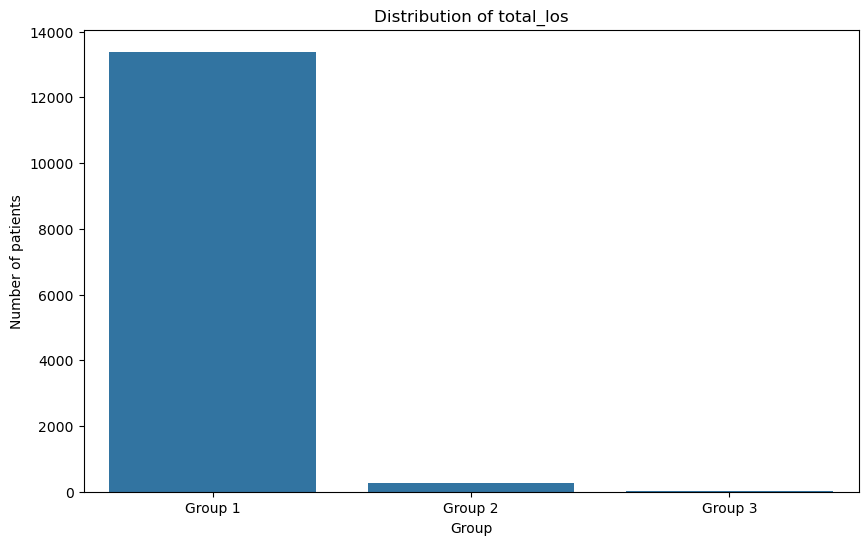

In [10]:
# Visualize patient data theo total_los
group_1 = patient_data[patient_data['total_los'] < 30]
group_2 = patient_data[(patient_data['total_los'] >= 30) & (patient_data['total_los'] < 60)]
group_3 = patient_data[(patient_data['total_los'] >= 60) & (patient_data['total_los'] < 90)]

print('Group 1:', len(group_1))
print('Group 2:', len(group_2))
print('Group 3:', len(group_3))

# Vẽ biểu đồ phân bố cho từng nhóm
plt.figure(figsize=(10, 6))

sns.barplot(x=['Group 1', 'Group 2', 'Group 3'], y=[len(group_1), len(group_2), len(group_3)])

plt.title('Distribution of total_los')
plt.xlabel('Group')
plt.ylabel('Number of patients')
plt.show()

In [11]:
def evaluate_models_by_stay_length(data, target_column, model, params_grid, splits=[30, 60, 90]):
    results = {}
    
    for max_days in splits:
        # Phân loại dữ liệu dựa trên số ngày nằm viện
        subset_data = data[data[target_column] <= max_days]
        X = subset_data.drop(columns=[target_column])
        y = subset_data[target_column]
        
        # Khởi tạo mô hình 
        classic_model = ClassicModel(model, params_grid)

        # Huấn luyện mô hình
        classic_model.fit(X, y)

        # Đánh giá mô hình
        mean_val_score, test_mae = classic_model.evaluate()
        
        # Lưu kết quả
        results[max_days] = {
            'mean_val_score': mean_val_score,
            'test_mae': test_mae
        }

    return results

In [12]:
# Evaluate models by stay length
results = evaluate_models_by_stay_length(patient_data, 'total_los', xgb_model, xgb_params)

for max_days, result in results.items():
    print(f"Max days: {max_days}")
    print(f"Mean validation error: {result['mean_val_score']}")
    print(f"Mean absolute error (test set): {result['test_mae']}")

/home/thangthewinner/anaconda3/lib/python3.12/site-packages/sklearn/utils/_array_api.py:701: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmin(X, axis=axis))
/home/thangthewinner/anaconda3/lib/python3.12/site-packages/sklearn/utils/_array_api.py:718: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmax(X, axis=axis))
/home/thangthewinner/anaconda3/lib/python3.12/site-packages/sklearn/utils/_array_api.py:701: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmin(X, axis=axis))
/home/thangthewinner/anaconda3/lib/python3.12/site-packages/sklearn/utils/_array_api.py:718: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmax(X, axis=axis))
/home/thangthewinner/anaconda3/lib/python3.12/site-packages/sklearn/utils/_array_api.py:701: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmin(X, axis=axis))
/home/thangthewinner/anaconda3/lib/python3.12/site-packages/sklearn/utils/_array_api.

Max days: 30
Mean validation error: 3.129199746832275
Mean absolute error (test set): 3.2091708203545024
Max days: 60
Mean validation error: 3.815055373957759
Mean absolute error (test set): 4.121049244623595
Max days: 90
Mean validation error: 3.958422695167531
Mean absolute error (test set): 3.940405319469095


### 5.4.2. Mô hình 2 giai đoạn

In [13]:
X_train, X_test, y_train, y_test = train_test_split(patient_data.drop(columns='total_los', axis=1), patient_data['total_los'], test_size=0.2, random_state=1)

train_label = [0 if los < 30 else 1 for los in y_train]

test_label = [0 if los < 30 else 1 for los in y_test]

Train label 0: 10714
Train label 1: 239
Test label 0: 2672
Test label 1: 67
Ratio of label 1 on all data: 0.0218205057974984


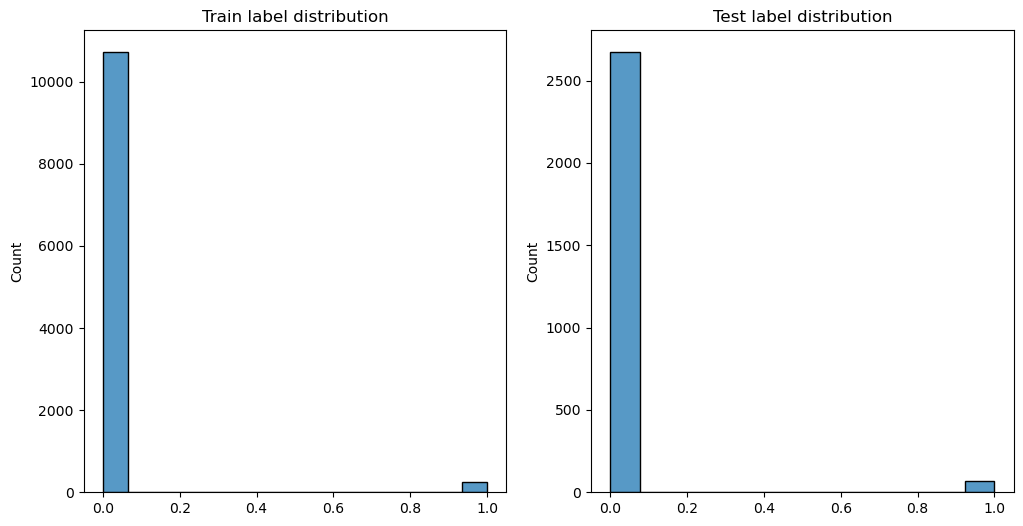

In [14]:
# Count the number of samples in each class
label_0_train = train_label.count(0)
label_1_train = train_label.count(1)
label_0_test = test_label.count(0)
label_1_test = test_label.count(1)

print('Train label 0:', label_0_train)
print('Train label 1:', label_1_train)
print('Test label 0:', label_0_test)
print('Test label 1:', label_1_test)
print('Ratio of label 1 on all data:' , label_1_train / (label_0_train + label_1_train))

# Show the distribution of the label
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(train_label)
plt.title('Train label distribution')
plt.subplot(1, 2, 2)
sns.histplot(test_label)
plt.title('Test label distribution')
plt.show()

Data is highly unbalenced

In [15]:
# Sử dụng grid search để tìm tham số tốt nhất cho mô hình hồi quy
reg1 = XGBRegressor()
reg2 = XGBRegressor()
params_grid_reg = {
    'learning_rate': [0.01, 0.02, 0.1, 0.2],
    'max_depth': [3, 5, 7, 9],
    'n_estimators': [200, 400, 600, 800]
}

grid_search_reg1 = GridSearchCV(estimator=reg1, param_grid=params_grid_reg, cv=10, scoring='neg_mean_absolute_error')
grid_search_reg2 = GridSearchCV(estimator=reg2, param_grid=params_grid_reg, cv=10, scoring='neg_mean_absolute_error')

# Chuẩn bị dữ liệu
X_train_grid = X_train.copy()
y_train_grid = y_train.copy()
X_test_grid = X_test.copy()
y_test_grid = y_test.copy()

X_train_1 = X_train_grid[y_train_grid < 30]
X_train_2 = X_train_grid[y_train_grid >= 30]

y_train_1 = y_train_grid[y_train_grid < 30]
y_train_2 = y_train_grid[y_train_grid >= 30]

# Chuẩn hóa dữ liệu
mm_scaler_loop = MinMaxScaler()
mm_scaler_loop.fit(X_train_grid)

X_train_1 = mm_scaler_loop.transform(X_train_1)
X_train_2 = mm_scaler_loop.transform(X_train_2)

# Xử lý giá trị thiếu cho X_train_1
imputer1 = SimpleImputer(missing_values=np.nan, strategy="constant", fill_value=0)
X_train_1 = imputer1.fit_transform(X_train_1)

# Xử lý giá trị thiếu cho X_train_2
imputer2 = SimpleImputer(missing_values=np.nan, strategy="constant", fill_value=0)
X_train_2 = imputer2.fit_transform(X_train_2)

# Sử dụng grid search để tìm tham số tốt nhất cho mô hình hồi quy
grid_search_reg1.fit(X_train_1, y_train_1)
grid_search_reg2.fit(X_train_2, y_train_2)

# Lấy ra tham số tốt nhất
best_params_reg1 = grid_search_reg1.best_params_
best_params_reg2 = grid_search_reg2.best_params_

/home/thangthewinner/anaconda3/lib/python3.12/site-packages/sklearn/utils/_array_api.py:701: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmin(X, axis=axis))
/home/thangthewinner/anaconda3/lib/python3.12/site-packages/sklearn/utils/_array_api.py:718: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmax(X, axis=axis))


In [16]:
print('Best params for regression 1:', best_params_reg1)
print('Best params for regression 2:', best_params_reg2)

Best params for regression 1: {'learning_rate': 0.02, 'max_depth': 5, 'n_estimators': 800}
Best params for regression 2: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}


In [17]:
# Khởi tạo KFold
kf = KFold(n_splits=10)
validation_score = []

# Huấn luyện mô hình
for train_index, test_index in kf.split(X_train):
    # Chuẩn bị dữ liệu
    X_training = X_train.iloc[list(train_index)]
    y_training = y_train.iloc[list(train_index)]
    X_validating = X_train.iloc[list(test_index)]
    y_validating = y_train.iloc[list(test_index)]
    
    # Chuẩn hóa dữ liệu
    mm_scaler_loop = MinMaxScaler()
    mm_scaler_loop.fit(X_training)

    # Nhãn cho bước phân loại
    train_label_loop = [0 if los < 30 else 1 for los in y_training]
    validating_label_loop = [0 if los < 30 else 1 for los in y_validating]

    # Chuẩn bị dữ liệu cho bước hồi quy
    X_train_1 = X_training[y_training < 30]
    X_train_2 = X_training[y_training >= 30]
    
    X_train_1 = mm_scaler_loop.transform(X_train_1)
    X_train_2 = mm_scaler_loop.transform(X_train_2)

    # Xử lý giá trị thiếu cho X_train_1
    imputer1 = SimpleImputer(missing_values=np.nan, strategy="constant", fill_value=0)
    X_train_1 = imputer1.fit_transform(X_train_1)

    # Xử lý giá trị thiếu cho X_train_2
    imputer2 = SimpleImputer(missing_values=np.nan, strategy="constant", fill_value=0)
    X_train_2 = imputer2.fit_transform(X_train_2)

    total_los_1 = np.array(y_training[y_training < 30])
    total_los_2 = np.array(y_training[y_training >= 30])

    # Chuẩn bị dữ liệu cho bước phân loại
    X_training = mm_scaler_loop.transform(X_training)
    X_validating = mm_scaler_loop.transform(X_validating)
    
    y_training = np.array(y_training)
    y_validating = np.array(y_validating)

    # Xử lý giá trị thiếu cho X_training
    imputer3 = SimpleImputer(missing_values=np.nan, strategy="constant", fill_value=0)
    X_training = imputer3.fit_transform(X_training)

    # Xử lý giá trị thiếu cho X_validating
    imputer4 = SimpleImputer(missing_values=np.nan, strategy="constant", fill_value=0)
    X_validating = imputer4.fit_transform(X_validating)

    # Huấn luyện hai mô hình hồi quy
    reg1 = XGBRegressor(**best_params_reg1, verbosity=0)
    reg2 = XGBRegressor(**best_params_reg2, verbosity=0)
    reg1.fit(X_train_1, total_los_1)
    reg2.fit(X_train_2, total_los_2)

    # Huấn luyện bộ phân loại
    xgb_classifier_model = XGBClassifier(early_stopping_rounds=200, verbosity=0)  # Khởi tạo mô hình XGBoost
    xgb_classifier_model.fit(X_training, np.array(train_label_loop),
                              eval_set=[(X_validating, validating_label_loop)], verbose=False)  # Huấn luyện mô hình

    # Xác thực mô hình lai
    y_predict_validate = []
    for i in range(X_validating.shape[0]):
        temp_X_validate = X_validating[i].reshape(1, -1)
        class_patient = xgb_classifier_model.predict(temp_X_validate)
        
        if class_patient[0] == 0:
            y_predicted = reg1.predict(temp_X_validate)
        else:
            y_predicted = reg2.predict(temp_X_validate)
        
        y_predict_validate.append(y_predicted[0])

    validating_loss = mean_absolute_error(y_validating, y_predict_validate)
    validation_score.append(validating_loss)

# In ra điểm số xác thực trung bình
mean_validation_error = np.mean(validation_score)
print(f'Average validation score: {mean_validation_error}')

/home/thangthewinner/anaconda3/lib/python3.12/site-packages/sklearn/utils/_array_api.py:701: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmin(X, axis=axis))
/home/thangthewinner/anaconda3/lib/python3.12/site-packages/sklearn/utils/_array_api.py:718: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmax(X, axis=axis))
/home/thangthewinner/anaconda3/lib/python3.12/site-packages/sklearn/utils/_array_api.py:701: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmin(X, axis=axis))
/home/thangthewinner/anaconda3/lib/python3.12/site-packages/sklearn/utils/_array_api.py:718: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmax(X, axis=axis))
/home/thangthewinner/anaconda3/lib/python3.12/site-packages/sklearn/utils/_array_api.py:701: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmin(X, axis=axis))
/home/thangthewinner/anaconda3/lib/python3.12/site-packages/sklearn/utils/_array_api.

Average validation score: 3.761508814702534


In [18]:
# Đánh giá trên tập kiểm tra
# Chuẩn hóa dữ liệu
mm_scaler = MinMaxScaler()
mm_scaler.fit(X_train)

X_train = mm_scaler.transform(X_train)
X_test = mm_scaler.transform(X_test)

# Xử lý giá trị thiếu cho X_train
imputer = SimpleImputer(missing_values=np.nan, strategy="constant", fill_value=0)
X_train = imputer.fit_transform(X_train)

# Xử lý giá trị thiếu cho X_test
X_test = imputer.fit_transform(X_test)

# Huấn luyện hai mô hình hồi quy
reg1 = XGBRegressor(**best_params_reg1, verbosity=0)
reg2 = XGBRegressor(**best_params_reg2, verbosity=0)
reg1.fit(X_train[y_train < 30], y_train[y_train < 30])
reg2.fit(X_train[y_train >= 30], y_train[y_train >= 30])

# Huấn luyện bộ phân loại
xgb_classifier_model = XGBClassifier(early_stopping_rounds=200, verbosity=0) 
xgb_classifier_model.fit(X_train, np.array(train_label), eval_set=[(X_test, y_test)], verbose=False)

# Xác thực mô hình lai
y_predict_test = []

for i in range(X_test.shape[0]):
    temp_X_test = X_test[i].reshape(1, -1)
    class_patient = xgb_classifier_model.predict(temp_X_test)
    
    if class_patient[0] == 0:
        y_predicted = reg1.predict(temp_X_test)
    else:
        y_predicted = reg2.predict(temp_X_test)
        
    y_predict_test.append(y_predicted[0])

mae_test = mean_absolute_error(y_test, y_predict_test)
print(f'Mean absolute error on test set: {mae_test}')

/home/thangthewinner/anaconda3/lib/python3.12/site-packages/sklearn/utils/_array_api.py:701: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmin(X, axis=axis))
/home/thangthewinner/anaconda3/lib/python3.12/site-packages/sklearn/utils/_array_api.py:718: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmax(X, axis=axis))


Mean absolute error on test set: 3.7697938481867888


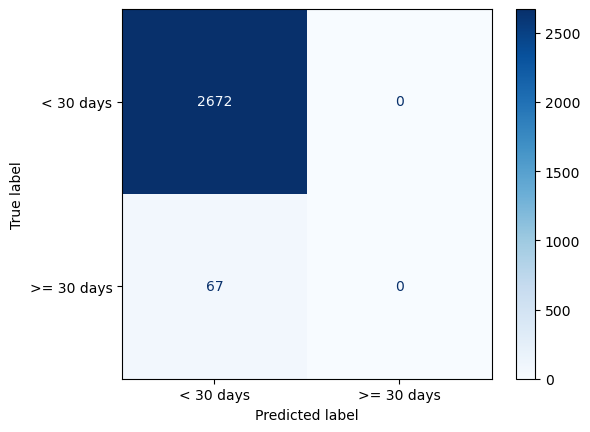

In [19]:
# Confusion matrix
y_pred_test = []
for i in range(X_test.shape[0]):
    temp_X_test = X_test[i].reshape(1, -1)
    class_patient = xgb_classifier_model.predict(temp_X_test)
    y_pred_test.append(class_patient[0])

cm = confusion_matrix(test_label, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['< 30 days', '>= 30 days'])
disp.plot(cmap=plt.cm.Blues)
plt.show()

Dựa vào kết quả ta có thể thấy dù chỉ số **mve** với **mae** cho ra thấp hơn bài nghiên cứu là tốt tuy nhiên về việc phân lớp tại mô hình 2 giai đoạn lại không khả thi bởi vì dựa vào **confusion matrix** ta có thể thấy mô hình đều phân loại sai đối với những dữ liệu có số ngày nằm viện lớn hơn 30 ngày.
Cho nên chúng tôi quyết định bỏ đi những bệnh nhân có số ngày nằm viện lớn hơn 30 ngày và chỉ tập trung vào những bệnh nhân nằm viện dưới 30 ngày.

### 5.4.3. Mô hình chuẩn đoán số ngày nằm viện (dưới 30 ngày)

In [20]:
patient_data_lower_30 = patient_data[patient_data['total_los'] < 30]

X_lower_30 = patient_data_lower_30.drop(columns='total_los', axis=1)
y_lower_30 = patient_data_lower_30['total_los']

gb_model_lower_30 = XGBRegressor()

gb_params_lower_30 = { 'learning_rate': [0.01, 0.02, 0.1, 0.2],
                        'max_depth': [3, 5, 7, 9],
                        'n_estimators': [200, 400, 600, 800]}

gb_lower_30_classic = ClassicModel(gb_model_lower_30, gb_params_lower_30)

gb_lower_30_classic.fit(X_lower_30, y_lower_30)

mve_gb_lower_30_classic, mae_gb_lower_30_classic = gb_lower_30_classic.evaluate()

print('Best params:', gb_lower_30_classic.best_params)
print('Mean validation score:', mve_gb_lower_30_classic)
print('MAE test:', mae_gb_lower_30_classic)

/home/thangthewinner/anaconda3/lib/python3.12/site-packages/sklearn/utils/_array_api.py:701: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmin(X, axis=axis))
/home/thangthewinner/anaconda3/lib/python3.12/site-packages/sklearn/utils/_array_api.py:718: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmax(X, axis=axis))
/home/thangthewinner/anaconda3/lib/python3.12/site-packages/sklearn/utils/_array_api.py:701: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmin(X, axis=axis))
/home/thangthewinner/anaconda3/lib/python3.12/site-packages/sklearn/utils/_array_api.py:718: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmax(X, axis=axis))
/home/thangthewinner/anaconda3/lib/python3.12/site-packages/sklearn/utils/_array_api.py:701: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmin(X, axis=axis))
/home/thangthewinner/anaconda3/lib/python3.12/site-packages/sklearn/utils/_array_api.

Best params: {'learning_rate': 0.02, 'max_depth': 5, 'n_estimators': 800}
Mean validation score: 3.129199746832275
MAE test: 3.2091708203545024
